<a href="https://colab.research.google.com/github/ArthurLanger/ArthurLanger/blob/main/C%C3%B3pia_de_%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# Análise dos Dados do Airbnb - *Berlim*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Berlim, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
df = pd.read_csv("http://data.insideairbnb.com/germany/be/berlin/2021-10-21/visualisations/listings.csv")


## Análise dos Dados


**Dicionário das variáveis**


* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.


In [ ]:
df.head(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90,62,147,2017-03-20,1.11,1,114,1,NaN
1,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54301,13.41534,Private room,33,1,293,2019-12-11,2.38,1,0,0,NaN
2,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180,6,8,2020-01-04,0.16,1,0,0,03/Z/RA/003410-18
3,14325,Apartment in Prenzlauer Berg,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.54813,13.40366,Entire home/apt,70,95,26,2013-02-01,0.26,3,132,1,NaN
4,16644,In the Heart of Berlin - Kreuzberg,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50312,13.43508,Entire home/apt,90,60,48,2017-12-14,0.40,2,175,0,NaN


### **Tendo em vista o acesso as 5 primeiras entradas vamos obet o número de  atributos (variáveis) e  entradas no nosso conjunto de dados, e os tipos das variáveis.**

In [ ]:
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

display(df.dtypes)


Entradas:	 17500
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Após obter os dados vamos analisar a porcentagem de valores ausentes no *dataset***

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


license                           0.792114
reviews_per_month                 0.185943
last_review                       0.185943
name                              0.001600
host_name                         0.000914
longitude                         0.000000
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

### **O tipo de distribuição das variáveis vai se expressar por meio do histograma abaixo** 

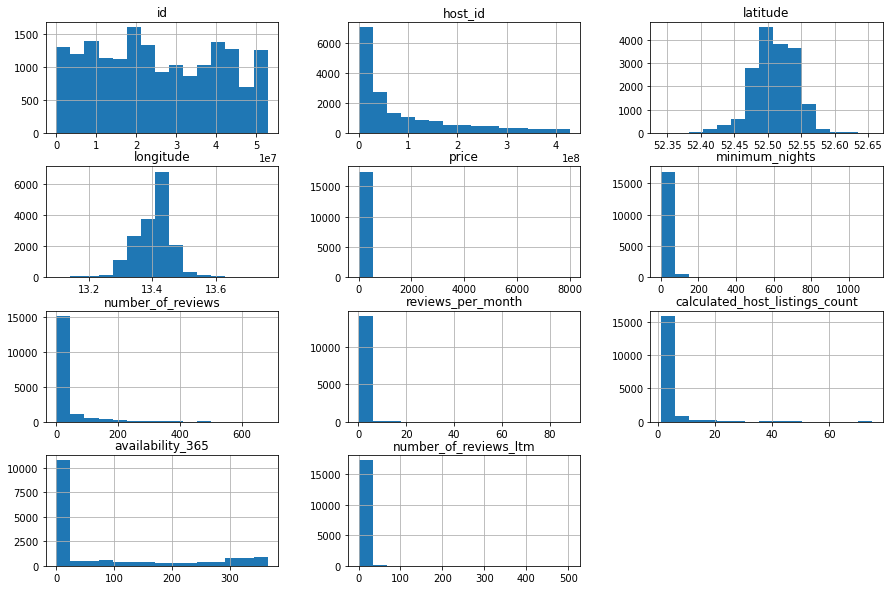

In [ ]:
df.hist(bins=15, figsize=(15,10));


### **Q4. Há outliers presentes?**

--- Antes, é necessário lembrar que outliers são números que fogem do padrão e devem ser levados em conta na hora de analisar dados, eles existem, porém são muito fora da normalidade sendo considerados, portanto, pontos fora das curvas.

 --- É possível observar nos histogramas acima a presença de outliers nos gráficos price, number of reviews itm e minimum nights por exemplo, distorcendo completamente toda a análise gráfica;
     Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:
     
**Resumo estatístico por meio do método describe()**

**Plotar boxplots para a variável.**



---



In [ ]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,17500.000000,17500.000000,17500.000000,14246.000000,17500.000000,17500.000000
mean,74.904857,10.039886,23.445200,0.811481,3.017143,82.404457
std,114.235123,35.056150,52.087808,1.626273,7.401975,123.690610
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,35.000000,2.000000,1.000000,0.090000,1.000000,0.000000
50%,55.000000,3.000000,4.000000,0.300000,1.000000,0.000000
75%,85.000000,5.000000,18.000000,1.000000,2.000000,149.000000
max,8000.000000,1124.000000,683.000000,88.420000,75.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável price possui 75% do valor abaixo de 85, porém seu valor máximo é  8000.

* A quantidade mínima de noites (minimum_nights) está acima de 365 dias no ano.

###Boxplot para minimum_nights

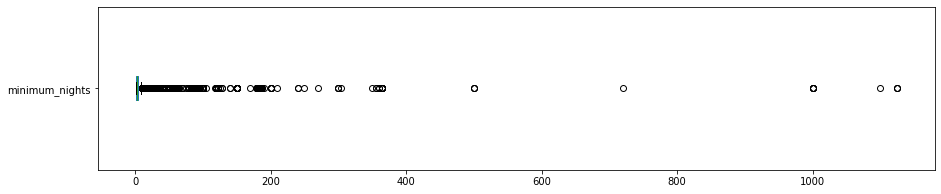

minimum_nights: valores acima de 30:
1003 entradas
5.7314%


In [ ]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))


###Boxplot para price


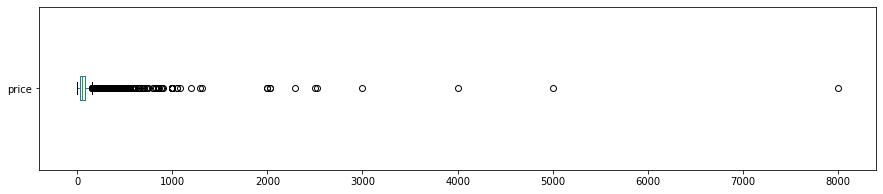


price: valores acima de 1500
11 entradas
0.0629%


In [ ]:
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))





###Histograma sem outliers
   Após identificar os outliers nas variáveis price e minimum_nights, vamos limpar o DataFrame e plotar novamente o histograma.


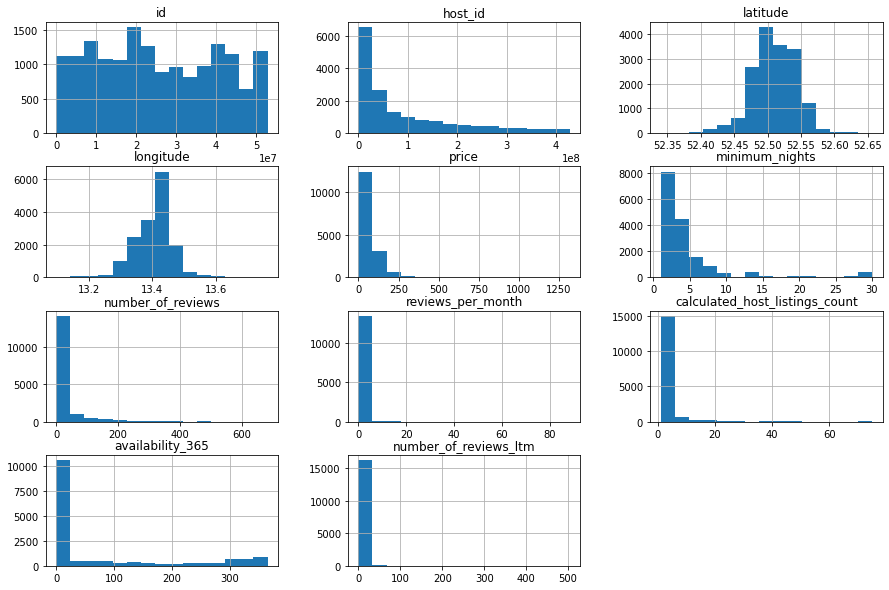

In [3]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)


df_clean.drop('neighbourhood_group', axis=1, inplace=True)


df_clean.hist(bins=15, figsize=(15,10));

###Efeitos notados após remover os outliers
é notável a diferença no histograma após a remoção dos outliers, valores de preços e noites mínimas que antes chegavam aos 15000 foram reduzidos consideravelmente.

###Q4. Qual a correlação existente entre as variáveis
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, após tratar os dados, excluindo outliers, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, iremos:

* Criar uma matriz de correlação

* Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

In [4]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.048903,0.055239,0.093865,0.164871,0.294811
minimum_nights,-0.048903,1.000000,-0.093294,-0.103893,0.123775,0.020634
number_of_reviews,0.055239,-0.093294,1.000000,0.561144,0.041909,0.243453
reviews_per_month,0.093865,-0.103893,0.561144,1.000000,0.085849,0.268856
calculated_host_listings_count,0.164871,0.123775,0.041909,0.085849,1.000000,0.323246
availability_365,0.294811,0.020634,0.243453,0.268856,0.323246,1.000000


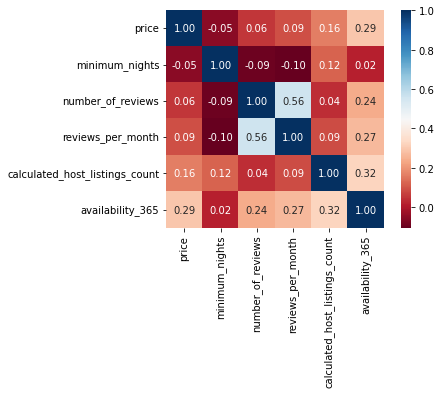

In [5]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
Agora que temos dados práticos, ''limpos'' e prontos para serem utilizados, vamos descobrir quais os tipos de imóveis mais alugados em Berlin, sejam eles apartamentos/casas inteiras ou apenas quartos.

In [6]:
df_clean.room_type.value_counts()


Entire home/apt    9006
Private room       7113
Shared room         207
Hotel room          162
Name: room_type, dtype: int64

In [7]:
df_clean.room_type.value_counts() / df_clean.shape[0]


Entire home/apt    0.546215
Private room       0.431405
Shared room        0.012555
Hotel room         0.009825
Name: room_type, dtype: float64

Em porcentagem, é evidente que;

* 54,6% dos imóveis alugados são casas/apts inteiros
* 43,1% dos imóveis alugados são quartos privados
* 1,25% dos imóveis alugados são quartos compartilhados
* 0,98% dos imóveis são quartos de hotel


### **Q6. Qual a localidade mais cara de Berlim?**

Berlim é uma cidade bastante marcada pelo contexto de sua divisão pós segunda guerra mundial, ambas as partes foram afetadas pelos gastos da guerra e vidas humanas perdidas, devido a isso a cidade possui ainda fortes diferenças com relações as zonas marcadas por esse cenário bipolarizado, o objetivo é usar o  groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.

In [8]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Haselhorst             181.250000
Charlottenburg Nord    140.333333
Rummelsburger Bucht    128.756098
Regierungsviertel      128.150327
Marzahn-Süd            126.958333
Kurfürstendamm         125.170940
Zehlendorf  Südwest    120.000000
Spandau Mitte          119.304348
Müggelheim             113.923077
Brunnenstr. Süd        110.533679
Name: price, dtype: float64

Com essa breve análise foi possível verificar que Haselhorst, uma localidade no bairro de Spandau possui os preços mais altos em relação às demais localidades

###Qual a localidade mais barata de Berlim

Brunnenstr. Süd apresentou a menor média de preços dentre as localidades.


###Latitude e Longitude dos imóveis

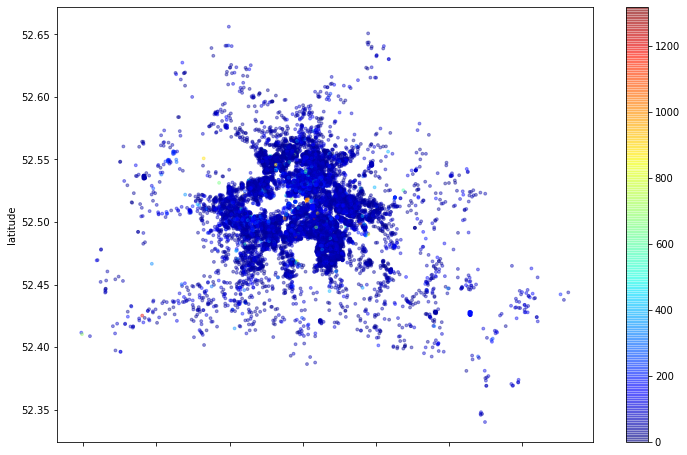

In [9]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [11]:
mean_df = df['minimum_nights'].mean()
print(mean_df)

10.039885714285715




```
# Isto está formatado como código
```

## Conclusões

  Com essa análise, é notável a importância do tratamento de dados, devido a existência de outliers, que distorcem toda a análise de dados, comprometendo a vericidade dos dados, com relação a cidade de Berlim é possível concluir que a cidade possui imóveis com preços acessíveis, isso é devido a um longo processo em que a cidade sofreu com crise imobiliária e histórico de altos preços, devido à isso o governo de Berlim lançou um projeto de congelamento do preço de aluguel de imóveis o que resultou em diversas consequências como problemas jurídicos e diminuição da oferta de imóveis. Basicamente, observando os dados, pode-se observar que existe alta vacância e preços baratos, o que torna Berlim uma cidade com muitos imóveis vagos, mas por motivos políticos, sendo portanto um mal lugar para investir no mercado imobiliário, porém, acessível à maioria das pessoas.
 

  

